In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

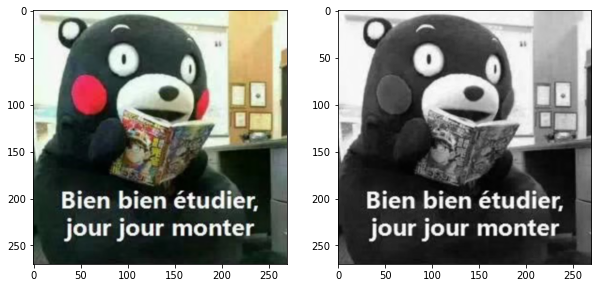

In [4]:
img = cv.imread('bear.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=[10, 8])
plt.subplot(1, 2, 1)
plt.imshow(img, interpolation='bicubic')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray', interpolation='bicubic')

In [5]:
cv.imwrite('bear_gray.jpg', img)

True

In [6]:
cap = cv.VideoCapture(0)
ret, frame = cap.read()
cap.release()
frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

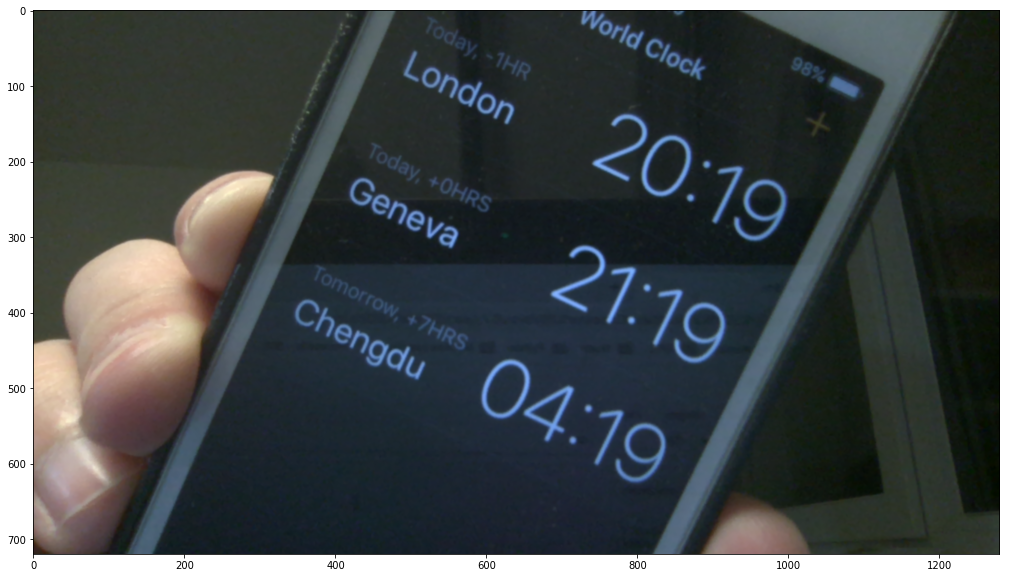

In [5]:
plt.figure(figsize=(19, 10))
plt.imshow(frame, interpolation='bicubic')

In [6]:
cap = cv.VideoCapture(0)
print('The image is {0:d}pt in width and {1:d}pt in length'.format(int(cap.get(3)), int(cap.get(4))))
cap.release()

The image is 1280pt in width and 720pt in length


In [7]:
import time
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('capture.mov', fourcc, 30.0, (1280, 720))
cap = cv.VideoCapture(0)
start = time.time()
while(cap.isOpened and (time.time() - start) <= 5):
    ret, frame = cap.read()
    if ret:
        out.write(frame)
    else:
        break
cap.release()
out.release()

In [7]:
green = np.array([[[0, 255, 0]]], dtype = np.uint8)
print(cv.cvtColor(green, cv.COLOR_BGR2HSV))

[[[ 60 255 255]]]


Original (270, 270)
Zoomed (540, 540)


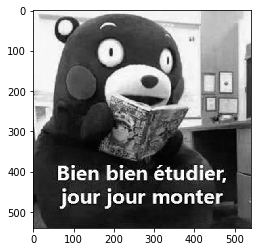

In [8]:
img_resize = cv.resize(img, None, fx = 2, fy = 2, interpolation = cv.INTER_CUBIC)
plt.imshow(img_resize, cmap='gray')
print('Original', img.shape)
print('Zoomed', img_resize.shape)

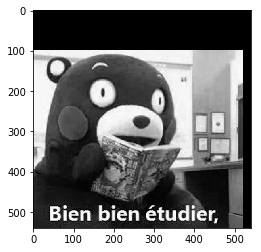

In [9]:
rows, cols = img_resize.shape
M = np.float32([[1, 0, -20], [0, 1, 100]])
temp = cv.warpAffine(img_resize, M, (rows, cols))
plt.imshow(temp, cmap='gray')

array([[  0.69282032,   0.4       , -25.06148722],
       [ -0.4       ,   0.69282032, 190.93851278]])

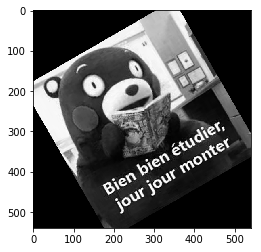

In [10]:
M = cv.getRotationMatrix2D((rows / 2, cols / 2), 30, 0.8)
temp = cv.warpAffine(img_resize, M, (rows, cols))
plt.imshow(temp, cmap='gray')
display(M)

array([[  1.26666667,   0.6       , -83.33333333],
       [ -0.33333333,   1.        ,  66.66666667]])

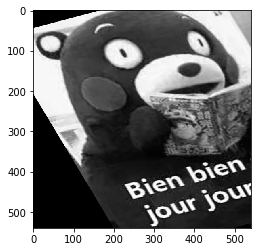

In [11]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
temp = cv.warpAffine(img_resize, M, (rows, cols))
plt.imshow(temp, cmap='gray')
display(M)

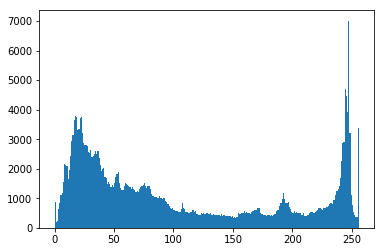

In [12]:
_, _, _, = plt.hist(img_resize.ravel(), 256, [0, 256])

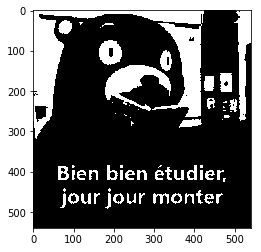

In [26]:
ret, th_temp = cv.threshold(img_resize, 200, 250, cv.THRESH_BINARY)
plt.imshow(th_temp, cmap='gray')

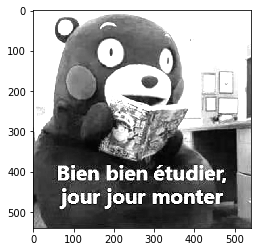

In [31]:
ret, th_temp = cv.threshold(img_resize, 150, 255, cv.THRESH_TRUNC)
plt.imshow(th_temp, cmap='gray')